<a href="https://colab.research.google.com/github/Vrushti-kulkarni/COMPUTE_vrushti/blob/main/listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
from google.colab import files
# from google.colab import drive
# drive.mount('/shared with me/drive')

***IMPORTING DATASET***


In [141]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [142]:
df = pd.read_csv('/content/gdrive/MyDrive/COMPUTE/listings_data.csv')

***EXAMINE DATASET***

In [143]:
df.head(5)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [144]:
df.shape

(48895, 16)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_name          48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_name             48874 non-null  object 
 4   borough               48895 non-null  object 
 5   area                  48895 non-null  object 
 6   latitude              48895 non-null  float64
 7   longitude             48895 non-null  float64
 8   room_type             48895 non-null  object 
 9   price (in dollars)    48895 non-null  int64  
 10  minimum_stay          48895 non-null  int64  
 11  no_of_reviews         48895 non-null  int64  
 12  last_review_date      38843 non-null  object 
 13  reviews_per_month     38843 non-null  float64
 14  host_listing_count    48895 non-null  int64  
 15  booking_availabilit

# ***DATA CLEANING***

In [146]:
df.isnull().sum() #checking null values

,0
listing_id,0
listing_name,16
host_id,0
host_name,21
borough,0
area,0
latitude,0
longitude,0
room_type,0
price (in dollars),0


In [147]:
x = (df.isnull().sum()/len(df)) *100
x[x!=0]

,0
listing_name,0.032723
host_name,0.042949
last_review_date,20.558339
reviews_per_month,20.558339


In [148]:
df.loc[df.duplicated(subset = ['latitude','longitude'])]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
11314,8783567,Studio Apt on The Upper West Side,46039971,Brady,Manhattan,Upper West Side,40.77874,-73.98437,Entire home/apt,190,5,15,21-03-2019,0.35,1,0
12313,9513278,Sunny and chic SoHo apartment,49293535,Aleksandra,Manhattan,SoHo,40.72741,-74.00178,Entire home/apt,185,3,2,26-05-2016,0.05,1,0
17472,13757434,"PRIVATE LARGE STUDIO FOR YOU, PLUS!",46644337,Sha,Brooklyn,Bedford-Stuyvesant,40.68398,-73.94101,Entire home/apt,90,2,113,22-06-2019,3.08,3,262
20094,16087406,2 BDRM Presidential Reserve at Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75368,-73.97358,Private room,1599,3,2,09-06-2017,0.08,12,365
21706,17447168,"Private Sunny Room in Williamsburg, Brooklyn - NY",30054890,Gary,Brooklyn,Williamsburg,40.70818,-73.94952,Private room,56,2,4,02-01-2019,0.14,2,0
23324,18879379,Time Square private studio,3291930,Mark,Manhattan,Hell's Kitchen,40.75888,-73.99077,Entire home/apt,155,1,0,NaN,NaN,1,0
28876,22267769,Cosy room in a cool Williamsburg Apt,72593389,Jeremy,Brooklyn,Williamsburg,40.71353,-73.96216,Private room,60,2,1,03-01-2018,0.05,1,0
28991,22316496,Cozy private room in the heart of Nolita / Soho,8726000,Larasati,Manhattan,Nolita,40.72347,-73.99302,Private room,70,2,2,25-02-2019,0.11,1,0
29883,23002312,Park Ave Apt in the Heart of NYC,42677381,Anna,Manhattan,Murray Hill,40.74882,-73.97788,Entire home/apt,250,3,9,03-01-2019,0.57,1,0
31740,24751420,Cozy and Spacious Studio in Columbus Circle,130965770,Joshua,Manhattan,Hell's Kitchen,40.76914,-73.98757,Entire home/apt,180,1,43,01-07-2019,4.37,1,2


In [149]:
df[df.duplicated(subset = ['listing_id'])]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability


In [150]:
df[df.duplicated(subset = ['host_id'])]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,01-01-2019,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,02-07-2019,0.61,6,304
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,01-07-2019,2.37,3,359
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,21-06-2019,1.41,3,340
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,05-07-2019,1.81,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [151]:
df[df['last_review_date'].isnull()]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [152]:
df[df['host_name'].isnull()]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,08-07-2019,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,02-01-2017,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,23-05-2019,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,20-10-2015,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,19-06-2019,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,01-07-2015,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,19-06-2019,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,01-08-2015,0.02,1,0


In [153]:
df['room_type'].nunique()

3

In [154]:
df[df['no_of_reviews']== 0]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [155]:
df.fillna({'reviews_per_month': 0}, inplace=True)
#same as df['reviews_per_month'].fillna(0)
df.fillna({'last_review_date':0}, inplace=True)
#filling missing values with 0

In [156]:
df['host_listing_count'].value_counts()

,count
host_listing_count,
1,32303
2,6658
3,2853
4,1440
5,845
6,570
8,416
7,399
327,327


In [157]:
(df.isnull().sum()/len(df)) *100

,0
listing_id,0.000000
listing_name,0.032723
host_id,0.000000
host_name,0.042949
borough,0.000000
area,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price (in dollars),0.000000


In [158]:
df[df['listing_name'].isnull()]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,08-06-2015,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,01-01-2015,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,02-01-2016,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,0,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,0,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,05-01-2016,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,0,0.00,5,0


# ***Plotting and feature engineering***


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = df[df['host_listing_count'] != 327]
df = df[df['host_listing_count'] != 232]
df = df[df['host_listing_count'] != 103]
df = df[df['host_listing_count'] != 121]

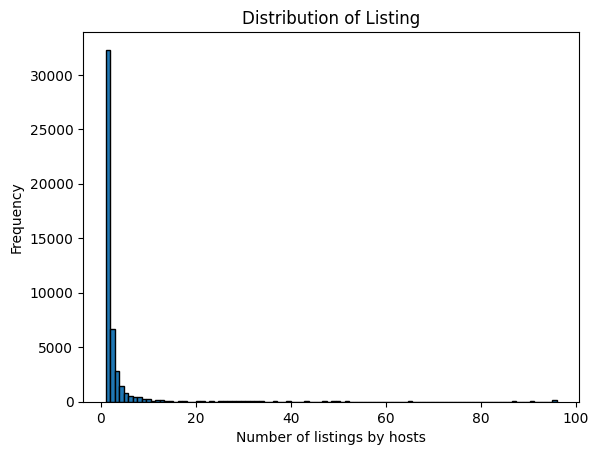

Maximum hosts have 1 listing only


In [161]:
plt.hist(df['host_listing_count'], bins=100, edgecolor='black')
plt.title('Distribution of Listing')
plt.xlabel('Number of listings by hosts')
plt.ylabel('Frequency')
plt.show()

print("Maximum hosts have 1 listing only")

In [162]:
copy = df.loc[df.duplicated(subset = ['latitude','longitude'])]
copy.drop_duplicates(keep = 'first')
copy.reset_index

<bound method DataFrame.reset_index of        listing_id                                       listing_name  \
11314     8783567                  Studio Apt on The Upper West Side   
12313     9513278                      Sunny and chic SoHo apartment   
17472    13757434                PRIVATE LARGE STUDIO FOR YOU, PLUS!   
20094    16087406  2 BDRM Presidential Reserve at Wyndham Midtown 45   
21706    17447168  Private Sunny Room in Williamsburg, Brooklyn - NY   
23324    18879379                         Time Square private studio   
28876    22267769               Cosy room in a cool Williamsburg Apt   
28991    22316496    Cozy private room in the heart of Nolita / Soho   
29883    23002312                   Park Ave Apt in the Heart of NYC   
31740    24751420        Cozy and Spacious Studio in Columbus Circle   
34190    27115251    NYC Spacious 3 BR / Private Entrance + Backyard   
36076    28666578     Large Cozy Bedroom 10 mins from Times Sq. 33C3   
37105    29501807     Sunny room with new Queen bed and large closet   
38490    30290307               Beautiful Central 2 Bedroom in Soho!   
40332    31283533               New York City Home w/ Full Amenities   
42383    32891427   Private Room in quiet XL East Village apartment!   
42790    33221933                                     Visitors Dream   
44369    34202149  Perfect 2 Bedroom Apt on East River, Williamsburg   
45797    34954790  Private apartment535\nREVIEWS ON PROFILE/Manha...   
47284    35675069  Newly Renovated Apartment (47 Buffalo 1F Room #2)   
47521    35790090                      Authentic Chelsea Studio Loft   
48880    36481315  The Raccoon Artist Studio in Williamsburg New ...   
48887    36483152    Garden Jewel Apartment in Williamsburg New York   

         host_id   host_name    borough                area  latitude  \
11314   46039971       Brady  Manhattan     Upper West Side  40.77874   
12313   49293535  Aleksandra  Manhattan                SoHo  40.72741   
17472   46644337         Sha   Brooklyn  Bedford-Stuyvesant  40.68398   
20094   69545883      Chayla  Manhattan             Midtown  40.75368   
21706   30054890        Gary   Brooklyn        Williamsburg  40.70818   
23324    3291930        Mark  Manhattan      Hell's Kitchen  40.75888   
28876   72593389      Jeremy   Brooklyn        Williamsburg  40.71353   
28991    8726000    Larasati  Manhattan              Nolita  40.72347   
29883   42677381        Anna  Manhattan         Murray Hill  40.74882   
31740  130965770      Joshua  Manhattan      Hell's Kitchen  40.76914   
34190    5179523         Max   Brooklyn        Williamsburg  40.71145   
36076  190921808        John  Manhattan      Hell's Kitchen  40.75584   
37105   77813945      Andrew  Manhattan        East Village  40.72145   
38490  227498924        Alex  Manhattan                SoHo  40.72607   
40332   39179346    Rooshabh  Manhattan             Midtown  40.75414   
42383     160356      Joseph  Manhattan        East Village  40.72504   
42790  250115747         Ivy     Queens           Ridgewood  40.70125   
44369   31628364       Sarah   Brooklyn        Williamsburg  40.71603   
45797  149564593      Robert  Manhattan     Upper East Side  40.76989   
47284  268358454       Devin   Brooklyn  Bedford-Stuyvesant  40.67825   
47521   89629761        Juan  Manhattan             Chelsea  40.74913   
48880  208514239       Melki   Brooklyn        Williamsburg  40.71232   
48887  208514239       Melki   Brooklyn        Williamsburg  40.71232   

       longitude        room_type  price (in dollars)  minimum_stay  \
11314  -73.98437  Entire home/apt                 190             5   
12313  -74.00178  Entire home/apt                 185             3   
17472  -73.94101  Entire home/apt                  90             2   
20094  -73.97358     Private room                1599             3   
21706  -73.94952     Private room                  56             2   
23324  -73.99077  Entire home/apt                 155

In [163]:
copy.shape

(23, 16)

In [164]:
print("There are total 23 repeated listings of airbnb")

There are total 23 repeated listings of airbnb


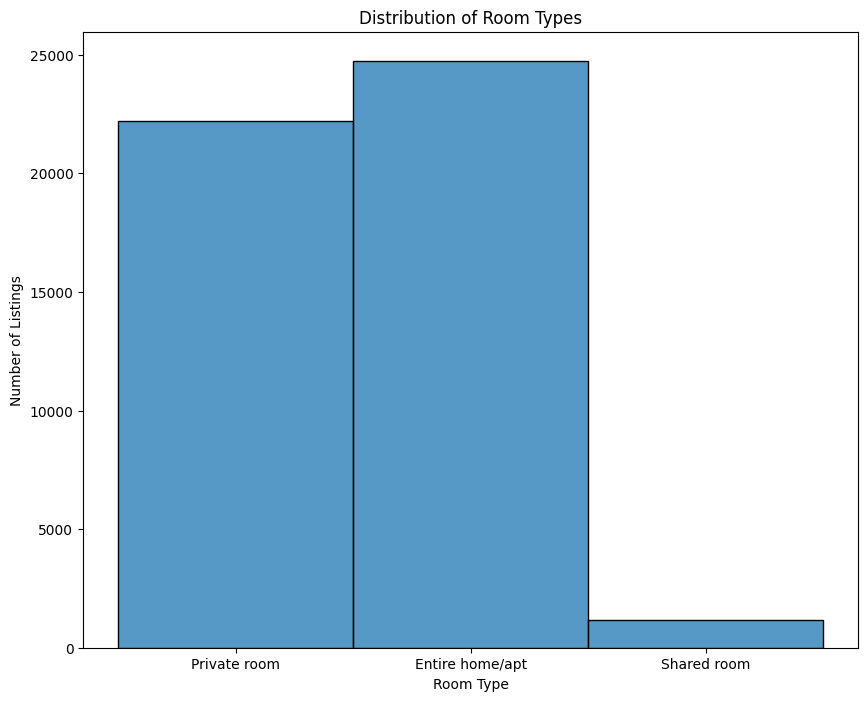

In [165]:
plt.figure(figsize=(10, 8))
sns.histplot(x='room_type',data = df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

plt.show()

In [166]:
df.head(2)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [167]:
df['minimum_amount'] = df['minimum_stay'] * df['price (in dollars)']

In [168]:
# mean = df['minimum_amount'].describe(include = 'all')
# mean

In [169]:
#converting categorical features to numerical valules
mapping = {'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3}

df['room_type_encoded'] = df['room_type'].map(mapping)

In [170]:
#finding correlations
df['room_type_encoded'].corr(df['price (in dollars)'])

#moderate to low correlation between price

0.20140722518276294

In [171]:
#finding correlations
df['room_type_encoded'].corr(df['minimum_amount'])

#low to no correlation between minimum amount and room type

0.03800401674404434

In [172]:
#finding correlations
df['room_type_encoded'].corr(df['minimum_stay'])

#low to no correlation between minimum stay and room type

0.061272641437748125

In [173]:
correlation = df.loc[:,['room_type_encoded','minimum_amount','minimum_stay','price (in dollars)']].copy()

Text(0, 0.5, 'Price')

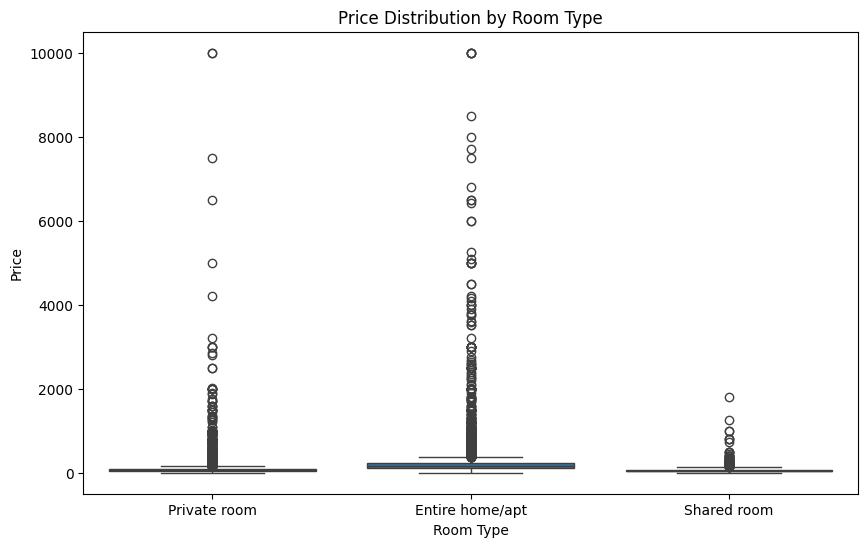

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price (in dollars)', data= df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

In [175]:
correlation.corr()

,room_type_encoded,minimum_amount,minimum_stay,price (in dollars)
room_type_encoded,1.000000,0.038004,0.061273,0.201407
minimum_amount,0.038004,1.000000,0.381852,0.442462
minimum_stay,0.061273,0.381852,1.000000,0.038437
price (in dollars),0.201407,0.442462,0.038437,1.000000


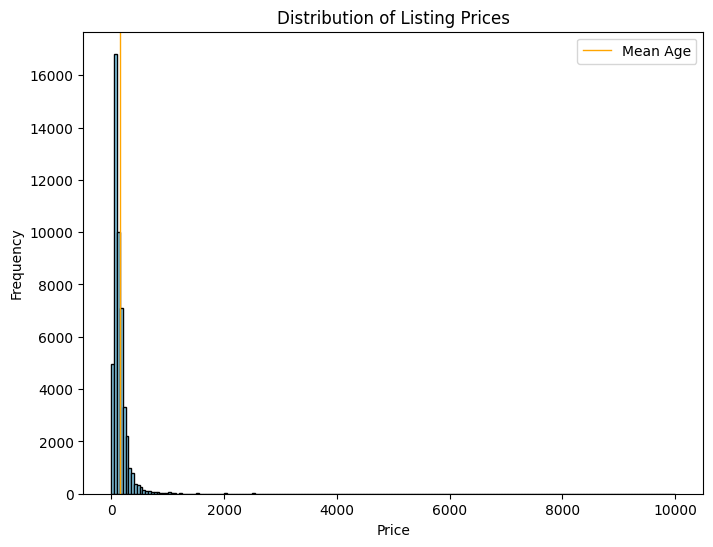

In [176]:
plt.figure(figsize=(8, 6))
plt.hist(df['price (in dollars)'], bins=200, edgecolor='black', color='skyblue')
plt.title('Distribution of Listing Prices')
mean_price = df['price (in dollars)'].mean()
plt.axvline(mean_price, color= 'orange' , label='Mean Age', linewidth=1)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [177]:
print ("mean price is ")
df['price (in dollars)'].mean()

mean price is 


151.23164699035584

In [178]:
df['price (in dollars)'].corr(df['no_of_reviews'])
#slight to no correlation

-0.04529104136091491